<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework Lab 6**


Let's first see again the proposed example before analyzing it in detail to answer both the primary and secondary questions.

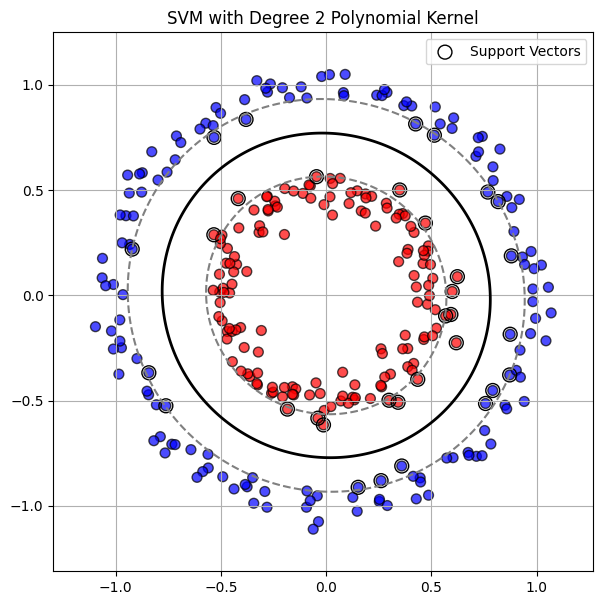

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)
# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

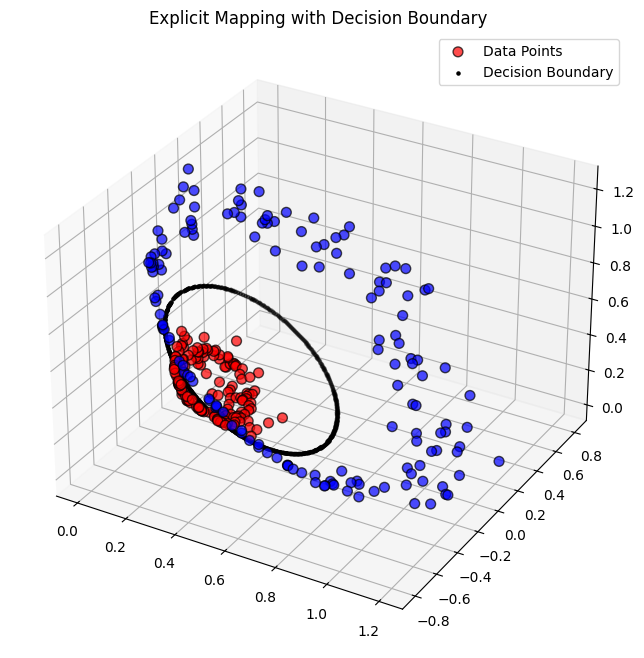

In [4]:

# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping with Decision Boundary')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()

### **Understanding the mapping**

We can look at the explicit mapping that a degree-2 polynomial kernel corresponds to: $$ K(x, x') = (x^\top x')^2 \Rightarrow \phi(x) = [x_1^2, \; \sqrt{2}x_1x_2, \; x_2^2] $$


This maps the original 2D input vector $x = (x_1, x_2)$ into a new point in a 3D feature space. Each new coordinate corresponds to a quadratic combination of the original features. This feature expansion allows the SVM to model more complex (nonlinear) boundaries in the original space. It essentially unfolds the 2D feature space into a higher-dimensional space where a simple linear separator (hyperplane) is sufficient.

- $x_1^2$ and $x_2^2$ capture quadratic variations of each input dimension.
- $\sqrt{2}x_1x_2$ captures interaction between features.

Together, they define a new space where patterns that appear nonlinear in 2D become linearly separable in 3D.


Let's map a few simple 2D points and visualize their 3D embedding:

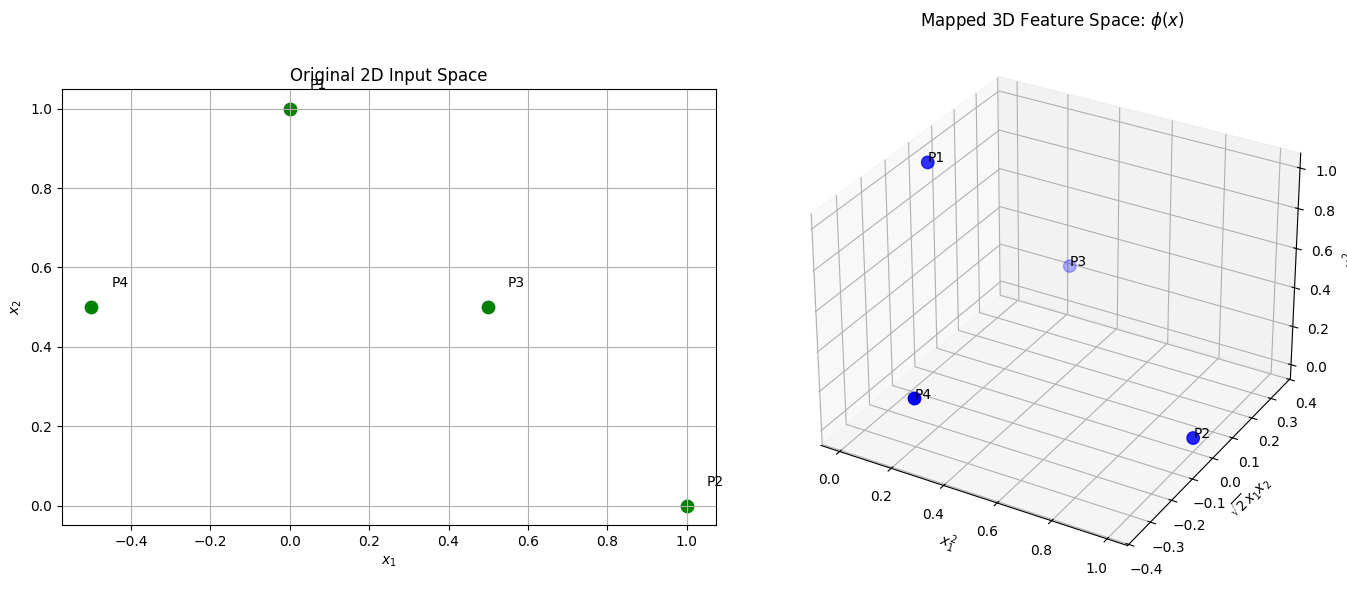

In [8]:
# Sample 2D points
sample_points = np.array([
    [0, 1],
    [1, 0],
    [0.5, 0.5],
    [-0.5, 0.5]
])

# Apply the feature map: phi(x) = [x1^2, sqrt(2)*x1*x2, x2^2]
phi_sample = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in sample_points])

# Create subplots
fig = plt.figure(figsize=(14, 6))

# --- 2D plot: original points ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(sample_points[:, 0], sample_points[:, 1], color='green', s=80)
for i, (x, _) in enumerate(zip(sample_points, phi_sample)):
    ax1.text(x[0] + 0.05, x[1] + 0.05, f"P{i+1}", fontsize=10)
ax1.set_title('Original 2D Input Space')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.grid(True)
ax1.set_aspect('equal')

# --- 3D plot: mapped points ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(phi_sample[:, 0], phi_sample[:, 1], phi_sample[:, 2], color='blue', s=80)
for i, phi_x in enumerate(phi_sample):
    ax2.text(phi_x[0], phi_x[1], phi_x[2], f"P{i+1}", fontsize=10)
ax2.set_title(r'Mapped 3D Feature Space: $\phi(x)$')
ax2.set_xlabel('$x_1^2$')
ax2.set_ylabel(r'$\sqrt{2}x_1x_2$')
ax2.set_zlabel('$x_2^2$')
ax2.grid(True)

plt.tight_layout()
plt.show()

When we apply a transformation $\phi(x)$ to map our original input data into a higher-dimensional feature space, we change the geometry of the classification problem. In that new space, the SVM finds a linear decision boundary, which is a hyperplane defined by $$w^T \phi(x) + b = 0$$

## **Primary Question: Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier's separating surface is mathematically linear in that space?**

Although the SVM decision boundary is a flat hyperplane mathematically in the 3D feature space, it doesn't look flat in the plot because we are plotting a curved 2D input grid that has been nonlinearly mapped into 3D.

The regular 2D grid used to evaluate the decision function is nonlinearly transformed by the feature map $\phi(x)$, resulting in a warped surface in 3D — so the flat hyperplane appears curved when intersecting that surface.
We are plotting a decision boundary based on a meshgrid built in the original 2D input space $(x_1, x_2)$. That grid is then passed through the nonlinear transformation $$\phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2] $$

This mapping distorts the spacing of the grid and creates a curved “slice” in the 3D space.

So, even if the hyperplane is perfectly flat in the 3D feature space, we are only seeing its intersection with a warped surface, which makes the plane look curved.

To verify that the decision boundary is truly a hyperplane, we can reconstruct and explicitly plot it in the 3D feature space:

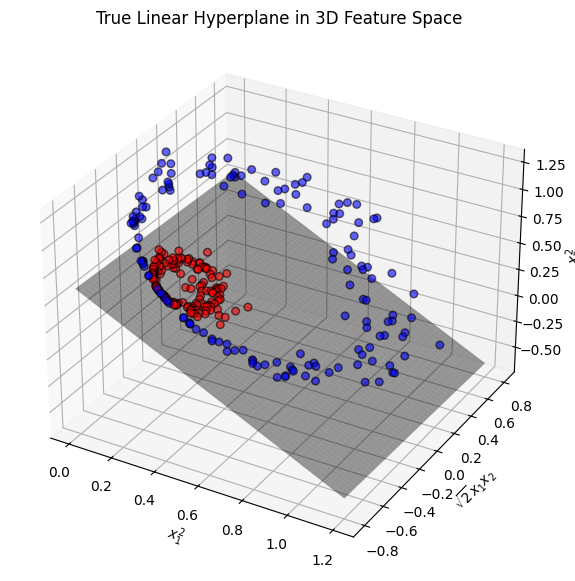

In [2]:
# Get weight vector and bias from the dual form (manually reconstructed)
support_vectors = clf.support_vectors_
dual_coef = clf.dual_coef_[0]
sv_labels = y[clf.support_]

# Reconstruct w from support vectors and dual coefficients
phi_sv = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in support_vectors])
w = np.dot(dual_coef, phi_sv)
b = clf.intercept_[0]

# Define a mesh for plotting the plane
xx_plane, yy_plane = np.meshgrid(np.linspace(0, 1.2, 50), np.linspace(-0.8, 0.8, 50))
zz_plane = (-w[0]*xx_plane - w[1]*yy_plane - b) / w[2]

# Plot data and hyperplane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=30, alpha=0.6)
ax.plot_surface(xx_plane, yy_plane, zz_plane, alpha=0.4, color='black', edgecolor='none', label='Hyperplane')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')
ax.set_title('True Linear Hyperplane in 3D Feature Space')
plt.show()

## **Secondary Question: Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.**

In the 3D feature space created by the polynomial kernel of degree 2, the SVM learns a linear decision boundary of the form: $$w^T \phi(x) + b = 0 $$ Since this equation is linear in the 3D feature space, it defines a flat decision boundary in that space.

Using the explicit feature mapping $$\phi(x) = [x_1^2, \; \sqrt{2}x_1x_2, \; x_2^2] $$

we get $$ w_1 x_1^2 + w_2 \sqrt{2} x_1 x_2 + w_3 x_2^2 + b = 0 $$


This is a second-degree (quadratic) equation in the original input variables $x_1$ and $x_2$.  Equations of this type define a centered conic, which include circle, ellipses, parabolas and hyperbolas.